## Instalar Paquetes

In [ ]:
%%capture
!pip install langchain

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
%%capture
!pip install openai

In [ ]:
#Paquetes:
from langchain.document_loaders import PyPDFLoader
from langchain.chains.question_answering import load_qa_chain
from langchain_community.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.memory import ConversationBufferMemory

In [ ]:
#Se carga el contenido del archivo pdf
loader=PyPDFLoader("/content/ACUERDO_008_2008_CSU_Estatuto_Estudiantil.pdf")
data=loader.load()

In [ ]:
len(data) #Lista de objetcos, donde cada objetos tiene dos llaves: source y page_content

14

In [ ]:
data[0].metadata

{'source': '/content/ACUERDO_008_2008_CSU_Estatuto_Estudiantil.pdf', 'page': 0}

In [ ]:
data[0].page_content

' \nCONSEJO SUPERIOR UNIVERSITARIO \n \nACUERDO NÚMERO 008  DE 2008 \nActa número 03 del 15 de Abril \n \n“Por el cual se adopta el Estatuto Estudiantil de la U niversidad Nacional de Colombia en \nsus disposiciones Académicas” \n \n \nEL CONSEJO SUPERIOR UNIVERSITARIO \nen ejercicio de sus facultades legales reglamentari as y  \n \n \nCONSIDERANDO:  \n \n1. Que mediante Acuerdo 101 de 1977 el Consejo Superi or Universitario modificó el \nReglamento Estudiantil de la Universidad Nacional de Colombia. \n \n2. Que durante la vigencia del Acuerdo 101 de 1977 de l Consejo Superior se han \npresentado múltiples modificaciones y reglamentaciones que  justifican su \nactualización. \n \n3. Que a pesar de los múltiples ajustes realizados al Acue rdo 101 de 1977 del Consejo \nSuperior Universitario – Estatuto Estudiantil vigente,  éste no refleja los importantes \ncambios producidos por la Constitución Política de 1991. \n \n4. Que la complejidad y el avance de las relaciones ent re la Universi

## Text Splitters




In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, #Particionamos nuestro texto en fragmentos de 1000 tokens, donde cada fragmento será uns instancia de mi base de datos vectorizada (Esto depende de la cantidad máxima de tokens que puede procesar el modelo de embeddings a utilizar)
    chunk_overlap=200, #Paraca cada fragmento, tomamos los últimos 200 tokens del último fragmento para mantener el contexto en cada fragmento
    length_function=len #Función para contar la longitud de los fragmentos de texto
)

documents = text_splitter.split_documents(data)

In [ ]:
len(documents) #De las 14 páginas que teniamos, extragimos 48 fragmentos de texto

48

In [ ]:
documents[20]

Document(metadata={'source': '/content/ACUERDO_008_2008_CSU_Estatuto_Estudiantil.pdf', 'page': 6}, page_content='Consejo Superior Universitario  Acuerdo 008 de 2008      página  7 \n \n \nPARÁGRAFO 2.  Cuando la prueba de validación se presenta por haber  reprobado la \nasignatura en el período inmediatamente anterior, sól o se descontará (del cupo para \ninscripción) el (50%) del número de créditos de la asig natura. \n \nPARÁGRAFO 3.  El número total de créditos de asignaturas que se autor ice para validar \ndebe estar acorde con lo dispuesto en el artículo 38 de la presente disposición.  \n \nARTÍCULO 30. Calificaciones. En la Universidad Nacional, las notas o calificaciones de \nlas asignaturas serán numéricas de cero punto cero (0.0) a cinco punto cero (5.0), en \nunidades y décimas. La calificación aprobatoria mínima ta nto de las asignaturas de \npregrado cómo de posgrado será la misma: tres punto cer o (3.0). \n \nPARÁGRAFO.  Si en los cómputos de las notas intermedias o defini

### OpenAI embeddings

In [ ]:
#Se carga la API Key de Open AI en las variables de entorno del sistema
from getpass import getpass
import os

OPENAI_API_KEY = getpass('Enter the secret value: ')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

Enter the secret value: ··········


In [ ]:
from langchain.embeddings import OpenAIEmbeddings

# Se utilizará un modelo de Embeddings de OpenAI:
embedding_openai = OpenAIEmbeddings(model="text-embedding-ada-002")

<ipython-input-14-3e3bfd361ce9>:4: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding_openai = OpenAIEmbeddings(model="text-embedding-ada-002")


[Embedding Models OpenAI](https://platform.openai.com/docs/guides/embeddings/embedding-models)

### Chroma

Chroma es un proyecto de código abierto que provee una base de datos específicamente diseñada para guardar y consultar incrustaciones, en conjunción con sus respectivos metadatos. Fue diseñada para trabajar con Modelos Grandes de Lenguaje (LLM).

In [ ]:
%%capture
!pip install chromadb

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00


In [ ]:
from langchain.vectorstores import Chroma

NOMBRE_INDICE_CHROMA = "instruct-embeddings-public-crypto" #Nombre de la carpeta en la que voy a guardar mi base de datos vectorial

vectorstore_chroma = Chroma.from_documents(
    documents=documents, #Fragmentos de texto a vectorizar
    embedding=embedding_openai, #Modelo de Embedding a utilizar para vectorizar los textos
    persist_directory=NOMBRE_INDICE_CHROMA #Directorio en el cual guardaré la carpeta de la base de datos vectorizada
)

## Búsqueda Por Similitud Semántica:

In [ ]:
query = "Qué es la admisión?"
docs = vectorstore_chroma.similarity_search_with_score(query, k=5) #Recupera los K fragmentos de texto más relacionados a la pregunta

In [ ]:
len(docs)

5

In [ ]:
docs[0]

(Document(metadata={'page': 1, 'source': '/content/ACUERDO_008_2008_CSU_Estatuto_Estudiantil.pdf'}, page_content='calidad de estudiante por el tiempo autorizado.  \n \nDE LA ADMISIÓN \n \nARTÍCULO 2. Admisión.  La admisión  es el proceso mediante el cual se selecciona a los \nestudiantes de alguno de los planes de estudio de la inst itución, con la aplicación de los \nmecanismos que establezca la Universidad. Estos mecanismos de  selección están \nsujetos a la disponibilidad de cupos y a las políticas de ingreso que las autoridades \nacadémicas determinen para la efectiva utilización de lo s mismos. \n \nARTÍCULO 3.  El Consejo Superior Universitario podrá crear, modif icar y reglamentar \nprogramas de admisión especiales. Dicha reglamentación deb e establecer, entre otros \naspectos, las condiciones académicas y de bienestar específicos  que tendrán los \nadmitidos a través de estos programas. \n \nARTÍCULO 4.  Los aspirantes seleccionados adquieren el estado de admiti dos y deberán \

## Retriever Augmented Generation

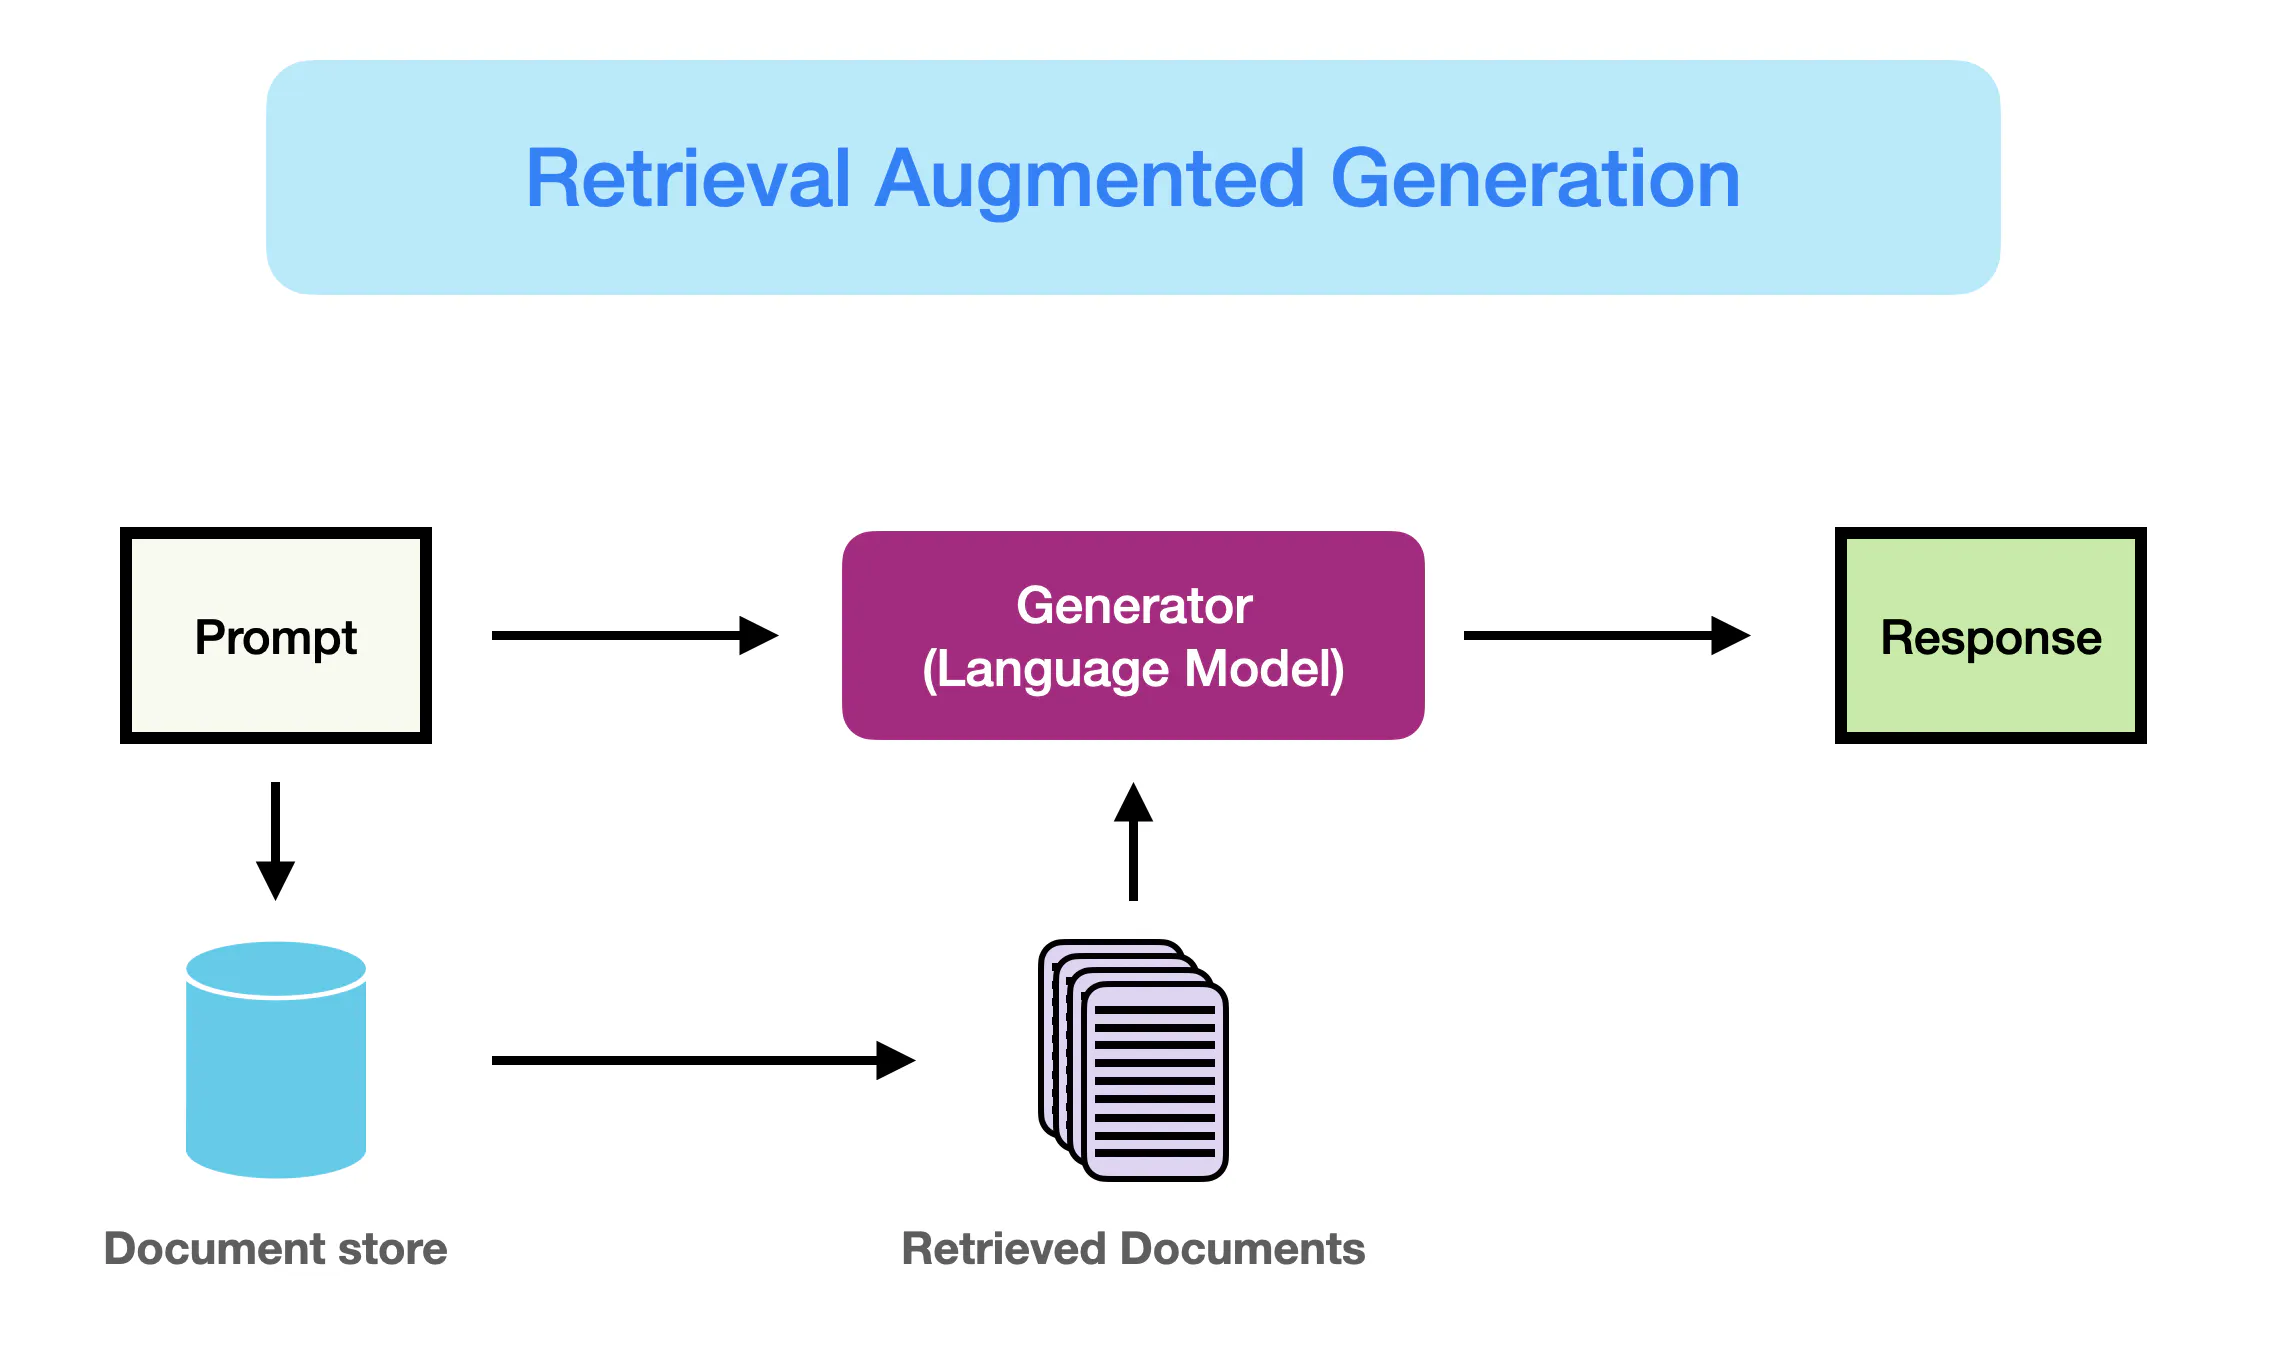

In [ ]:
#Plantilla de Prompt:
template="""
Se te proporcionará una serie de textos que dan instrucciones a cerca de como resolver preguntas a un estudiante de la universidad Nacional de Colombia, de acuerdo a estos textos responde a la pregunta de la manera más completa posible. Redactame una respuesta que sea lo más fiel posible a los textos que te estoy entregando.

Dado el siguiente contexto, responde a las preguntas hechas por el humano:

{context}

Human: {human_input}
Chatbot (RESPUESTA FORMAL):

"""

#Entradas a el Prompt:
prompt=PromptTemplate(input_variables=["context","human_input"],template=template)

In [ ]:
#Se define cadaena para conversación:
chain=load_qa_chain(ChatOpenAI(model_name="gpt-3.5-turbo",temperature=0.5),prompt=prompt)

In [ ]:
pregunta=input("Pregunta: ")

Pregunta: Qué es una admisión?


In [ ]:
#Recuperación del contexto para responder la pregunta:
docs = vectorstore_chroma.similarity_search(pregunta,k=5)
docs

[Document(metadata={'page': 1, 'source': '/content/ACUERDO_008_2008_CSU_Estatuto_Estudiantil.pdf'}, page_content='calidad de estudiante por el tiempo autorizado.  \n \nDE LA ADMISIÓN \n \nARTÍCULO 2. Admisión.  La admisión  es el proceso mediante el cual se selecciona a los \nestudiantes de alguno de los planes de estudio de la inst itución, con la aplicación de los \nmecanismos que establezca la Universidad. Estos mecanismos de  selección están \nsujetos a la disponibilidad de cupos y a las políticas de ingreso que las autoridades \nacadémicas determinen para la efectiva utilización de lo s mismos. \n \nARTÍCULO 3.  El Consejo Superior Universitario podrá crear, modif icar y reglamentar \nprogramas de admisión especiales. Dicha reglamentación deb e establecer, entre otros \naspectos, las condiciones académicas y de bienestar específicos  que tendrán los \nadmitidos a través de estos programas. \n \nARTÍCULO 4.  Los aspirantes seleccionados adquieren el estado de admiti dos y deberán \

In [ ]:
#Readcción de la Respuesta a Partir del Contexto:
response=chain({"input_documents":docs,"human_input":pregunta})
response

{'input_documents': [Document(metadata={'page': 1, 'source': '/content/ACUERDO_008_2008_CSU_Estatuto_Estudiantil.pdf'}, page_content='calidad de estudiante por el tiempo autorizado.  \n \nDE LA ADMISIÓN \n \nARTÍCULO 2. Admisión.  La admisión  es el proceso mediante el cual se selecciona a los \nestudiantes de alguno de los planes de estudio de la inst itución, con la aplicación de los \nmecanismos que establezca la Universidad. Estos mecanismos de  selección están \nsujetos a la disponibilidad de cupos y a las políticas de ingreso que las autoridades \nacadémicas determinen para la efectiva utilización de lo s mismos. \n \nARTÍCULO 3.  El Consejo Superior Universitario podrá crear, modif icar y reglamentar \nprogramas de admisión especiales. Dicha reglamentación deb e establecer, entre otros \naspectos, las condiciones académicas y de bienestar específicos  que tendrán los \nadmitidos a través de estos programas. \n \nARTÍCULO 4.  Los aspirantes seleccionados adquieren el estado de ad

In [ ]:
response["output_text"]

'La admisión es el proceso mediante el cual se selecciona a los estudiantes de algún plan de estudio de la institución, con la aplicación de los mecanismos que establezca la Universidad. Estos mecanismos de selección están sujetos a la disponibilidad de cupos y a las políticas de ingreso que las autoridades académicas determinen para la efectiva utilización de los mismos. Una vez seleccionados, los aspirantes adquieren el estado de admitidos y deben hacer uso del derecho de matrícula inicial en los plazos establecidos por la Universidad para formalizar su ingreso como estudiantes.'

In [ ]:
pregunta=input("Pregunta: ")

Pregunta: Cúal es la capital de Colombia?


In [ ]:
#Readcción de la Respuesta a Partir del Contexto:
response=chain({"input_documents":docs,"human_input":pregunta})["output_text"]
response

'La capital de Colombia es Bogotá. Para poder responder a tu pregunta, es importante tener en cuenta que la calidad de estudiante en la Universidad Nacional de Colombia se adquiere a través del proceso de admisión, el cual implica la entrega de documentación exigida, el pago de los costos establecidos por la Universidad y la realización de la inscripción. Además, es necesario renovar la matrícula en cada período académico una vez se cancele el valor de la misma y se esté a paz y salvo por todo concepto. En caso contrario, se pierde la calidad de estudiante. Es importante destacar que los aspirantes seleccionados deben hacer uso del derecho de matrícula inicial en los plazos establecidos por la Universidad, de lo contrario perderán el estado de admitidos. Por otro lado, los estudiantes de pregrado con la opción de doble titulación conservarán su Historia Académica y podrán recibir un cupo adicional de créditos para inscripción en caso de presentar un Promedio Aritmético Ponderado Acumul

## Memoria a Corto y Largo Plazo:

**Memoria a Largo Plazo:** Es aquel conocimiento que intrinsecamente el modelo posee; ya que fue entrenado con dichos datos o dicho conocimiento.

**Memoria a Corto Plazo:** Es aquel contexto que le proporcionamos al LLM acerca de las interacciones anteriores através de un prompt.

In [ ]:
#Introduciendo la Memoria a Corto Plazo en el Prompt:
#Plantilla de Prompt:
template="""
Se te proporcionará una serie de textos que dan instrucciones a cerca de como resolver preguntas a un estudiante de la universidad Nacional de Colombia, de acuerdo a estos textos responde a la pregunta de la manera más completa posible.

Dado el siguiente contexto y teniendo en cuenta eñ historial de la conversación, responde a las preguntas hechas por el humano:

{context}

{chat_history}
Human: {human_input}
Chatbot (RESPUESTA FORMAL):

"""

#Entradas a el Prompt:
prompt=PromptTemplate(input_variables=["chat_history","context","human_input"],template=template)

In [ ]:
#Definiendo elemento de memoria a corto plazo:
memory=ConversationBufferMemory(memory_key="chat_history",input_key="human_input")

<ipython-input-44-54b542181113>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory=ConversationBufferMemory(memory_key="chat_history",input_key="human_input")


In [ ]:
#Se define cadaena para conversación:
chain=load_qa_chain(ChatOpenAI(model_name="gpt-3.5-turbo",temperature=0),prompt=prompt,memory=memory)

In [ ]:
pregunta=input("Pregunta: ")

Pregunta: Mi nombre es Santiago, tengo 22 años y soy ingeniero, puedes decirme qué es la admisión?


In [ ]:
#Readcción de la Respuesta a Partir del Contexto:
response=chain({"input_documents":docs,"human_input":pregunta,"chat_history":memory})["output_text"]
response

'La admisión es el proceso mediante el cual se selecciona a los estudiantes de alguno de los planes de estudio de la institución, con la aplicación de los mecanismos que establezca la Universidad. Estos mecanismos de selección están sujetos a la disponibilidad de cupos y a las políticas de ingreso que las autoridades académicas determinen para la efectiva utilización de los mismos. Una vez seleccionado, el aspirante adquiere el estado de admitido y debe hacer uso del derecho de matrícula inicial en los plazos establecidos por la Universidad para formalizar su ingreso como estudiante.'

In [ ]:
pregunta=input("Pregunta: ")

Pregunta: Quién es Santiago?


In [ ]:
#Recuperación del contexto para responder la pregunta:
docs = vectorstore_chroma.similarity_search(pregunta,k=5)

In [ ]:
#Readcción de la Respuesta a Partir del Contexto:
response=chain({"input_documents":docs,"human_input":pregunta,"chat_history":memory})["output_text"]
response

'Santiago es un estudiante de 22 años que se identifica como ingeniero.'

In [ ]:
chain.memory

ConversationBufferMemory(chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Mi nombre es Santiago, tengo 22 años y soy ingeniero, puedes decirme qué es la admisión?', additional_kwargs={}, response_metadata={}), AIMessage(content='La admisión es el proceso mediante el cual se selecciona a los estudiantes de alguno de los planes de estudio de la institución, con la aplicación de los mecanismos que establezca la Universidad. Estos mecanismos de selección están sujetos a la disponibilidad de cupos y a las políticas de ingreso que las autoridades académicas determinen para la efectiva utilización de los mismos. Una vez seleccionado, el aspirante adquiere el estado de admitido y debe hacer uso del derecho de matrícula inicial en los plazos establecidos por la Universidad para formalizar su ingreso como estudiante.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Quién es Santiago?', additional_kwargs={}, response_metadata={}), AIMessage(content='Santi

## Ejercicios:

1. Qué pasa si el elemento de memoria se vuelve muy extenso? En tal caso consultar e implementar:
- Summary Memory.
- Buffer-Summary Memory.

2. Será que todas las preguntas tienen k=5 fragmentos de textos relacionados? Implementar un sistema de RAG Adaptativo; para esto se debe implementar un LLM que filtre los fragmentos de texto que en realidad son relevantes a la hora de responder la pregunta hecha por el usuario.

3. Implementar un Chatbot con memoria a corto plazo que responda preguntas acerca del paper que se estén leyendo.